In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import callbacks, optimizers
import pandas as pd
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import glob
import seaborn as sn

%matplotlib inline

Using TensorFlow backend.


In [2]:
# dimensions of our images
train_data_dir = '/home/matt/Repos/IndyML/Image Classification/data_raw/train'
validation_data_dir = '/home/matt/Repos/IndyML/Image Classification/data_raw/validation'
n_train_samples = 1800
n_validation_samples = 100
epochs = 10
batch_size = 20
n_classes = 4
img_width, img_height = 80, 80
input_shape = (img_width, img_height, 3)

In [3]:
# if K.image_data_format() == 'channels_first':
#     input_shape = (3, img_width, img_height)
#     print(input_shape)
# else:
#     input_shape = (img_width, img_height, 3)
#     print(input_shape)

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='categorical')

Found 1801 images belonging to 4 classes.


In [5]:
validation_datagen = ImageDataGenerator(rescale=1. / 255)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='categorical')

Found 687 images belonging to 4 classes.


In [6]:
# sets up the model shape
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

# # callback for recording things to tensorboard
# tbCallBack = callbacks.TensorBoard(log_dir='../data/logs/' + log_dir, histogram_freq=1,
#                                    write_graph=True, 
#                                    write_images=True, 
#                                    embeddings_freq=1)

# runs the model
model.fit_generator(
    train_generator, 
    validation_data=validation_generator,
    class_weight='balanced',
    steps_per_epoch=int(n_train_samples / batch_size),
    validation_steps=int(n_validation_samples / batch_size), 
    epochs=epochs
    )

Epoch 1/10
90/90 [==============================] - 4s - loss: 1.0090 - acc: 0.5761 - val_loss: 0.6444 - val_acc: 0.7500
Epoch 2/10
90/90 [==============================] - 3s - loss: 0.6861 - acc: 0.7211 - val_loss: 0.3573 - val_acc: 0.8700
Epoch 3/10
90/90 [==============================] - 3s - loss: 0.5812 - acc: 0.7612 - val_loss: 0.3718 - val_acc: 0.8400
Epoch 4/10
90/90 [==============================] - 3s - loss: 0.5002 - acc: 0.8094 - val_loss: 0.2887 - val_acc: 0.8600
Epoch 5/10
90/90 [==============================] - 3s - loss: 0.3996 - acc: 0.8422 - val_loss: 0.5360 - val_acc: 0.8600
Epoch 6/10
90/90 [==============================] - 3s - loss: 0.3312 - acc: 0.8722 - val_loss: 0.2900 - val_acc: 0.8900
Epoch 7/10
90/90 [==============================] - 3s - loss: 0.2988 - acc: 0.8739 - val_loss: 0.2590 - val_acc: 0.9100
Epoch 8/10
90/90 [==============================] - 3s - loss: 0.2356 - acc: 0.9139 - val_loss: 0.2121 - val_acc: 0.9300
Epoch 9/10
90/90 [==============

In [7]:
folders = ['bart', 'hommer', 'lisa', 'marge']
y = []
y_hat = []

for i in range(len(folders)):
    files = glob.glob('/home/matt/Repos/simpsons/data_raw/color/validation/' + folders[i] + '/*.jpg')
    for f in files:
        img = Image.open(f)
        img = img.resize((img_width, img_height), Image.ANTIALIAS)
        y.append(i)
        y_hat.append(model.predict_classes(np.expand_dims(np.asarray(img), axis=0))[0])

1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


In [8]:
sum(1 for i, j in zip(y_hat, y) if i == j) / float(len(y_hat))

0.8922852983988355

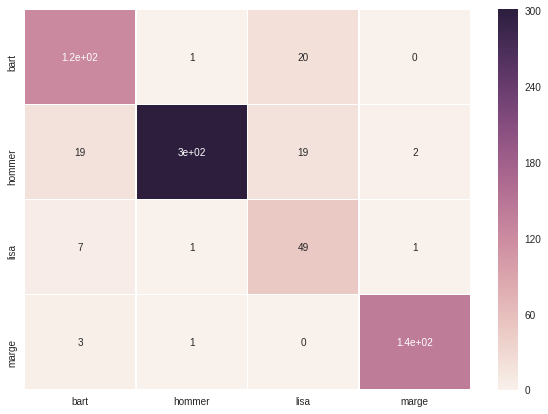

In [9]:
conf_matrix = [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
for i in range(len(y)):
    conf_matrix[y[i]][y_hat[i]] += 1

df_cm = pd.DataFrame(conf_matrix, index = ['bart', 'hommer', 'lisa', 'marge'],
                  columns = ['bart', 'hommer', 'lisa', 'marge'])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, linewidths=0.5)